# 2. Principles of Programming

**Learning goals**
- Reason about algorithms, correctness, readability, and testing.
- Use control flow, decomposition (functions), and documentation.
- Practice complexity thinking (Big‑O) at a high level.

## Core principles
- **Decomposition**: break down into small functions.
- **Readability**: naming, comments, docstrings, PEP 8.
- **Correctness**: tests (doctest/pytest), invariants.
- **Complexity**: time/space costs; prefer simpler solutions first.
- **Versioning**: keep history via Git, iterate in notebooks via checkpoints.

In [27]:
def is_prime(n: int) -> bool:
    """Return True if n is a prime.

    >>> is_prime(2)
    True
    >>> is_prime(9)
    False
    """
    if n < 2:
        return False
    i = 2
    while i * i <= n:
        if n % i == 0:
            return False
        i += 1
    return True

for k in range(1, 20):
    print(k, is_prime(k))

1 False
2 True
3 True
4 False
5 True
6 False
7 True
8 False
9 False
10 False
11 True
12 False
13 True
14 False
15 False
16 False
17 True
18 False
19 True


### Simple testing with `doctest`

In [28]:
import doctest
doctest.testmod(verbose=True)

Trying:
    tmp = pathlib.Path("tiny.csv")
Expecting nothing
ok
Trying:
    _ = tmp.write_text("col\n1\n2\n3\n")
Expecting nothing
ok
Trying:
    column_stats("tiny.csv", "col")
Expecting:
    (3, 2.0, 0.816496580927726, 1.0, 3.0)
ok
Trying:
    fibonacci(7)
Expecting:
    [0, 1, 1, 2, 3, 5, 8]
ok
Trying:
    is_prime(2)
Expecting:
    True
ok
Trying:
    is_prime(9)
Expecting:
    False
ok
Trying:
    normalize([1, 1, 2])
Expecting:
    [0.25, 0.25, 0.5]
ok
Trying:
    normalize([])
Expecting:
    []
ok
19 items had no tests:
    __main__
    __main__.Counter
    __main__.Counter.__init__
    __main__.Counter.add
    __main__.Counter.items
    __main__.TestNormalize
    __main__.TestNormalize.test_basic
    __main__.TestNormalize.test_empty
    __main__.TestNormalize.test_sum_to_one
    __main__.fib_dp
    __main__.fib_iter
    __main__.fib_memo
    __main__.fib_recursive
    __main__.func
    __main__.insertion_sort
    __main__.max_or_none
    __main__.moving_average
    __main__.sa

TestResults(failed=0, attempted=8)

### Exercise
Implement `fibonacci(n)` returning a list of first `n` Fibonacci numbers.
Add a doctest to check `fibonacci(7) == [0,1,1,2,3,5,8]`.

In [29]:
# TODO
def fibonacci(n: int):
    """Return first n Fibonacci numbers.

    >>> fibonacci(7)
    [0, 1, 1, 2, 3, 5, 8]
    """
    seq = []
    a, b = 0, 1
    for _ in range(n):
        seq.append(a)
        a, b = b, a + b
    return seq

import doctest; doctest.testmod(verbose=True)

Trying:
    tmp = pathlib.Path("tiny.csv")
Expecting nothing
ok
Trying:
    _ = tmp.write_text("col\n1\n2\n3\n")
Expecting nothing
ok
Trying:
    column_stats("tiny.csv", "col")
Expecting:
    (3, 2.0, 0.816496580927726, 1.0, 3.0)
ok
Trying:
    fibonacci(7)
Expecting:
    [0, 1, 1, 2, 3, 5, 8]
ok
Trying:
    is_prime(2)
Expecting:
    True
ok
Trying:
    is_prime(9)
Expecting:
    False
ok
Trying:
    normalize([1, 1, 2])
Expecting:
    [0.25, 0.25, 0.5]
ok
Trying:
    normalize([])
Expecting:
    []
ok
19 items had no tests:
    __main__
    __main__.Counter
    __main__.Counter.__init__
    __main__.Counter.add
    __main__.Counter.items
    __main__.TestNormalize
    __main__.TestNormalize.test_basic
    __main__.TestNormalize.test_empty
    __main__.TestNormalize.test_sum_to_one
    __main__.fib_dp
    __main__.fib_iter
    __main__.fib_memo
    __main__.fib_recursive
    __main__.func
    __main__.insertion_sort
    __main__.max_or_none
    __main__.moving_average
    __main__.sa

TestResults(failed=0, attempted=8)

# 🧭 Principles of Programming — Expanded

This expanded section adds **algorithm design**, **pseudocode**, **complexity**, **testing**, **debugging**, **type hints**, and **software craft** (style, docs, version control). Use it as a quick reference during labs.

## 1) Algorithm Design & Pseudocode

**Recipe → Code**: Start with plain-language steps, then structure as pseudocode before writing Python.

**Example: find the maximum in a list**

Pseudocode:
```
set best to -∞
for each item x in list:
    if x > best:
        best = x
return best
```

Edge cases to consider:
- Empty list → raise error or return `None`?
- Non-numeric items?

In [30]:
def max_or_none(xs):
    if not xs:
        return None
    best = xs[0]
    for x in xs[1:]:
        if x > best:
            best = x
    return best

print(max_or_none([3, 10, -5, 7]))
print(max_or_none([]))

10
None


## 2) Complexity (Big‑O) — Why it matters

**Big‑O** describes how runtime/memory grows with input size *n*.

- `O(1)` constant
- `O(log n)` logarithmic
- `O(n)` linear
- `O(n log n)` typical efficient sorts
- `O(n^2)` quadratic (nested loops)

The point: prefer better growth rates when `n` gets large.

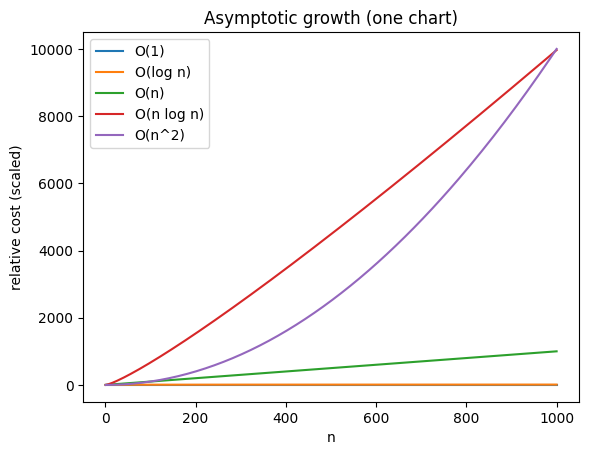

In [31]:
# Single-plot sketch of common growth rates
import numpy as np
import matplotlib.pyplot as plt

n = np.linspace(1, 1000, 200)
curves = {
    "O(1)": np.ones_like(n),
    "O(log n)": np.log2(n),
    "O(n)": n,
    "O(n log n)": n*np.log2(n),
    "O(n^2)": n**2 / 100,  # scaled down for visibility
}

for label, y in curves.items():
    plt.plot(n, y, label=label)

plt.xlabel("n")
plt.ylabel("relative cost (scaled)")
plt.title("Asymptotic growth (one chart)")
plt.legend()
plt.show()

## 3) Practice: Sorting design & timing

- Python's built-in `sorted` uses **Timsort** (`O(n log n)` average/worst).
- We'll compare it to a simple **insertion sort** (`O(n^2)`) for small `n`.

> This is for **learning**, not to replace `sorted`!

In [1]:
import random, time

def insertion_sort(a):
    a = a[:]  # copy
    for i in range(1, len(a)):
        key = a[i]
        j = i-1
        while j >= 0 and a[j] > key:
            a[j+1] = a[j]
            j -= 1
        a[j+1] = key
    return a

for n in [100, 300, 800]:
    data = [random.randint(0, 10_000) for _ in range(n)]
    t0 = time.perf_counter(); s1 = insertion_sort(data); t1 = time.perf_counter()
    t2 = time.perf_counter(); s2 = sorted(data);          t3 = time.perf_counter()
    print(f"n={n:4d}  insertion={t1-t0:.6f}s  sorted()={t3-t2:.6f}s  same={s1==s2}")

n= 100  insertion=0.000187s  sorted()=0.000009s  same=True
n= 300  insertion=0.001498s  sorted()=0.000028s  same=True
n= 800  insertion=0.017390s  sorted()=0.000080s  same=True


## 4) Testing: doctest & unittest

- **Doctest** keeps tiny examples inside docstrings.
- **unittest/pytest** supports larger suites.

We'll show both quickly.

In [33]:
def normalize(xs):
    """Return xs scaled to sum to 1.

    >>> normalize([1, 1, 2])
    [0.25, 0.25, 0.5]
    >>> normalize([])
    []
    """
    if not xs:
        return []
    s = float(sum(xs))
    return [x/s for x in xs]

import doctest
doctest.testmod(verbose=True)

Trying:
    tmp = pathlib.Path("tiny.csv")
Expecting nothing
ok
Trying:
    _ = tmp.write_text("col\n1\n2\n3\n")
Expecting nothing
ok
Trying:
    column_stats("tiny.csv", "col")
Expecting:
    (3, 2.0, 0.816496580927726, 1.0, 3.0)
ok
Trying:
    fibonacci(7)
Expecting:
    [0, 1, 1, 2, 3, 5, 8]
ok
Trying:
    is_prime(2)
Expecting:
    True
ok
Trying:
    is_prime(9)
Expecting:
    False
ok
Trying:
    normalize([1, 1, 2])
Expecting:
    [0.25, 0.25, 0.5]
ok
Trying:
    normalize([])
Expecting:
    []
ok
19 items had no tests:
    __main__
    __main__.Counter
    __main__.Counter.__init__
    __main__.Counter.add
    __main__.Counter.items
    __main__.TestNormalize
    __main__.TestNormalize.test_basic
    __main__.TestNormalize.test_empty
    __main__.TestNormalize.test_sum_to_one
    __main__.fib_dp
    __main__.fib_iter
    __main__.fib_memo
    __main__.fib_recursive
    __main__.func
    __main__.insertion_sort
    __main__.max_or_none
    __main__.moving_average
    __main__.sa

TestResults(failed=0, attempted=8)

In [34]:
# Minimal unittest example
import unittest

class TestNormalize(unittest.TestCase):
    def test_basic(self):
        self.assertEqual(normalize([2, 2]), [0.5, 0.5])
    def test_empty(self):
        self.assertEqual(normalize([]), [])
    def test_sum_to_one(self):
        self.assertAlmostEqual(sum(normalize([1,2,3])), 1.0)

suite = unittest.defaultTestLoader.loadTestsFromTestCase(TestNormalize)
unittest.TextTestRunner(verbosity=2).run(suite);

test_basic (__main__.TestNormalize.test_basic) ... ok
test_empty (__main__.TestNormalize.test_empty) ... ok
test_sum_to_one (__main__.TestNormalize.test_sum_to_one) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.006s

OK


## 5) Assertions, Logging, Debugging

- **Assertions** check assumptions in code; remove with `-O` flag, so use for internal checks.
- **Logging** records runtime info without print‑spam.
- **Debugging**: use breakpoints (`%debug`, `pdb`, or VS Code debugger).

In [35]:
import logging
logging.basicConfig(level=logging.INFO, format="%(levelname)s:%(message)s")

def safe_ratio(a, b):
    assert isinstance(a, (int, float)) and isinstance(b, (int, float)), "numbers only"
    if b == 0:
        logging.warning("division by zero, returning None")
        return None
    return a/b

print(safe_ratio(6, 3))
print(safe_ratio(6, 0))

2.0
None


## 6) Style (PEP 8), Docstrings, Type Hints

- Follow **PEP 8**: naming, line length ~79/99, spaces after commas, etc.
- Use **docstrings**: `"""Summary..."""` with parameters/returns.
- Add **type hints** for clarity and static checks (with `mypy`).

Example:

In [36]:
from typing import Iterable, List

def moving_average(xs: Iterable[float], k: int) -> List[float]:
    """Return simple moving average with window k.

    Args:
        xs: numeric sequence
        k: window size (>0)

    Returns:
        list of averages (length n-k+1)

    Raises:
        ValueError: if k <= 0 or k > len(xs)
    """
    xs = list(xs)
    n = len(xs)
    if k <= 0 or k > n:
        raise ValueError("invalid window size")
    out = []
    s = sum(xs[:k])
    out.append(s/k)
    for i in range(k, n):
        s += xs[i] - xs[i-k]
        out.append(s/k)
    return out

print(moving_average([1,2,3,4,5], 3))

[2.0, 3.0, 4.0]


## 7) Paradigms: Functional vs OOP (when to use which)

- **Functional**: stateless functions, immutability, composability. Great for data transforms.
- **OOP**: encapsulate state/behavior. Great for modeling entities or when you need polymorphism.

Small example: Counting words (functional) vs a tiny `Counter` class (OOP).

In [37]:
# Functional style
def word_counts(text: str):
    counts = {}
    for w in text.lower().split():
        counts[w] = counts.get(w, 0) + 1
    return counts

print(word_counts("To be or not to be"))

# OOP style
class Counter:
    def __init__(self):
        self._d = {}
    def add(self, key, n=1):
        self._d[key] = self._d.get(key, 0) + n
    def items(self):
        return sorted(self._d.items())

c = Counter()
for w in "to be or not to be".split():
    c.add(w.lower())
print(c.items())

{'to': 2, 'be': 2, 'or': 1, 'not': 1}
[('be', 2), ('not', 1), ('or', 1), ('to', 2)]


## 8) Version Control Basics (Git)

- `git init`, `git add`, `git commit -m "msg"`
- `git status`, `git log`, `git diff`
- Branches: `git switch -c feature-x`, merge with Pull Requests.
- In notebooks, keep outputs small (clear heavy images) to reduce diffs.

## 9) Mini Capstone — CSV Stats CLI (💡 Challenge)

**Goal**: Write a function `column_stats(path, col)` that returns `count, mean, std, min, max` for a numeric column in a CSV file.

**Steps**:
1. Design pseudocode.
2. Implement with docstring + type hints.
3. Add doctests for a tiny sample file.
4. Run a small `unittest`.

In [38]:
import csv, math, pathlib

def column_stats(path: str, col: str):
    """Return (count, mean, std, min, max) for numeric column `col` in CSV at `path`.

    Examples
    --------
    >>> tmp = pathlib.Path("tiny.csv")
    >>> _ = tmp.write_text("col\\n1\\n2\\n3\\n")
    >>> column_stats("tiny.csv", "col")
    (3, 2.0, 0.816496580927726, 1.0, 3.0)
    """
    values = []
    with open(path, newline='', encoding='utf-8') as f:
        r = csv.DictReader(f)
        for row in r:
            if row.get(col) not in (None, ""):
                values.append(float(row[col]))
    if not values:
        return (0, float('nan'), float('nan'), float('nan'), float('nan'))
    n = len(values)
    mean = sum(values)/n
    var = sum((x-mean)**2 for x in values)/n
    std = var**0.5
    return (n, mean, std, min(values), max(values))

if __name__ == "__main__":
    import doctest
    doctest.testmod(verbose=True)

Trying:
    tmp = pathlib.Path("tiny.csv")
Expecting nothing
ok
Trying:
    _ = tmp.write_text("col\n1\n2\n3\n")
Expecting nothing
ok
Trying:
    column_stats("tiny.csv", "col")
Expecting:
    (3, 2.0, 0.816496580927726, 1.0, 3.0)
ok
Trying:
    fibonacci(7)
Expecting:
    [0, 1, 1, 2, 3, 5, 8]
ok
Trying:
    is_prime(2)
Expecting:
    True
ok
Trying:
    is_prime(9)
Expecting:
    False
ok
Trying:
    normalize([1, 1, 2])
Expecting:
    [0.25, 0.25, 0.5]
ok
Trying:
    normalize([])
Expecting:
    []
ok
19 items had no tests:
    __main__
    __main__.Counter
    __main__.Counter.__init__
    __main__.Counter.add
    __main__.Counter.items
    __main__.TestNormalize
    __main__.TestNormalize.test_basic
    __main__.TestNormalize.test_empty
    __main__.TestNormalize.test_sum_to_one
    __main__.fib_dp
    __main__.fib_iter
    __main__.fib_memo
    __main__.fib_recursive
    __main__.func
    __main__.insertion_sort
    __main__.max_or_none
    __main__.moving_average
    __main__.sa

## 🔄 Example: Fibonacci Performance — Naive Recursion vs Dynamic Programming

The Fibonacci sequence is a classic case for comparing algorithmic strategies.

- **Naive recursion**: `fib(n) = fib(n-1) + fib(n-2)`  
  - Exponential time `O(2^n)` due to repeated recomputation.
- **Memoization / Dynamic Programming**: store results and reuse them.  
  - Linear time `O(n)`.

In [39]:
import time

# -------------------------------------------------------
# 1) Naive recursive implementation
# -------------------------------------------------------
# - Defines Fibonacci recursively:
#     F(0) = 0, F(1) = 1
#     F(n) = F(n-1) + F(n-2)
# - This version recomputes the same subproblems many times.
# - Time complexity: O(2^n) (exponential).
# - Very slow for larger n (e.g., n=40+).
def fib_recursive(n: int) -> int:
    if n <= 1:
        return n
    return fib_recursive(n-1) + fib_recursive(n-2)


# -------------------------------------------------------
# 2) Dynamic Programming with Memoization (Top-Down)
# -------------------------------------------------------
# - Uses a dictionary "memo" to remember results of subproblems.
# - Each unique n is computed only once, then cached.
# - Time complexity: O(n) (linear).
# - Space complexity: O(n) due to recursion stack + memo.
# - Much faster than naive recursion, even for larger n.
def fib_dp(n: int, memo={0: 0, 1: 1}) -> int:
    if n in memo:              # If already computed, return cached value
        return memo[n]
    # Otherwise compute and store
    memo[n] = fib_dp(n-1, memo) + fib_dp(n-2, memo)
    return memo[n]


# -------------------------------------------------------
# 3) Iterative DP (Bottom-Up Tabulation)
# -------------------------------------------------------
# - Builds Fibonacci sequence iteratively from the bottom up.
# - Avoids recursion and dictionary lookups.
# - Time complexity: O(n), Space: O(1) (only keeps last 2 values).
# - Usually the fastest and most memory-efficient approach in Python.
def fib_iter(n: int) -> int:
    if n <= 1:
        return n
    a, b = 0, 1
    for _ in range(2, n+1):
        a, b = b, a+b   # shift the window forward
    return b


# -------------------------------------------------------
# Performance Comparison
# -------------------------------------------------------
# - For fairness, we test smaller n for fib_recursive (since it explodes).
# - For DP/memoized versions, we can handle much larger n (e.g., 1000).
# - We time each implementation and print results.
for func in [fib_recursive, fib_dp, fib_iter]:
    n = 35 if func == fib_recursive else 1000
    t0 = time.perf_counter()
    result = func(n)
    t1 = time.perf_counter()
    print(f"{func.__name__:<15} \n"
            f" fib({n}) = {result} numbers \n"
            f" time = {t1-t0:.6f} s\n")

fib_recursive   
 fib(35) = 9227465 numbers 
 time = 1.301297 s

fib_dp          
 fib(1000) = 43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875 numbers 
 time = 0.000889 s

fib_iter        
 fib(1000) = 43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875 numbers 
 time = 0.000050 s



👉 **Observation**:  
- The naive recursive version becomes infeasible beyond ~35–40.  
- DP (memoization or iterative) handles values up to thousands easily.  
- This demonstrates why **algorithm choice** matters more than micro‑optimizations.

## 🚀 Fibonacci Performance: Naive vs Dynamic Programming

We'll compare three implementations of Fibonacci `F(n)`:

1. **Naive recursive** (exponential time, repeated work)
2. **Memoized recursive** (top‑down dynamic programming with caching)
3. **Bottom‑up iterative** (tabulation: linear time, constant space)

Then we **time** them on increasing `n` and plot a single chart.

In [40]:
import functools, time, math

# 1) Naive recursive (hard-coded logic)
def fib_recursive(n: int) -> int:
    if n <= 1:
        return n
    return fib_recursive(n-1) + fib_recursive(n-2)

# 2) Memoized recursive (top-down DP)
@functools.lru_cache(maxsize=None)
def fib_memo(n: int) -> int:
    if n <= 1:
        return n
    return fib_memo(n-1) + fib_memo(n-2)

# 3) Bottom-up iterative (tabulation)
def fib_iter(n: int) -> int:
    if n <= 1:
        return n
    a, b = 0, 1
    for _ in range(2, n+1):
        a, b = b, a+b
    return b

# Quick correctness check
for k in range(10):
    assert fib_recursive(k) == fib_memo(k) == fib_iter(k)
print("Sanity check passed for n=0..9")

Sanity check passed for n=0..9


In [41]:
import time

def time_fn(fn, n, repeat=1):
    t0 = time.perf_counter()
    res = None
    for _ in range(repeat):
        res = fn(n)
    t1 = time.perf_counter()
    return res, (t1 - t0)/repeat

# Choose ns that won't take forever for naive recursion
ns = [5, 10, 20, 25, 30, 32, 34]

rows = []
for n in ns:
    # Reset memo cache to fairly time the first call scenario for each n
    fib_memo.cache_clear()
    r1, t_rec = time_fn(fib_recursive, n, repeat=1)
    r2, t_mem = time_fn(fib_memo, n, repeat=1)
    r3, t_itr = time_fn(fib_iter, n, repeat=1000)  # iterate many times to measure small cost
    assert r1 == r2 == r3
    rows.append((n, t_rec, t_mem, t_itr))

print("n | naive_recursive (s) | memoized (s) | iterative (s per 1000 calls)")
for n, a, b, c in rows:
    print(f"{n:2d} | {a:18.6f} | {b:11.6f} | {c: .8f}")

n | naive_recursive (s) | memoized (s) | iterative (s per 1000 calls)
 5 |           0.000002 |    0.000002 |  0.00000013
10 |           0.000007 |    0.000002 |  0.00000019
20 |           0.000732 |    0.000006 |  0.00000037
25 |           0.025686 |    0.000055 |  0.00000110
30 |           0.315841 |    0.000017 |  0.00000151
32 |           0.300513 |    0.000111 |  0.00000062
34 |           0.572115 |    0.000117 |  0.00000142


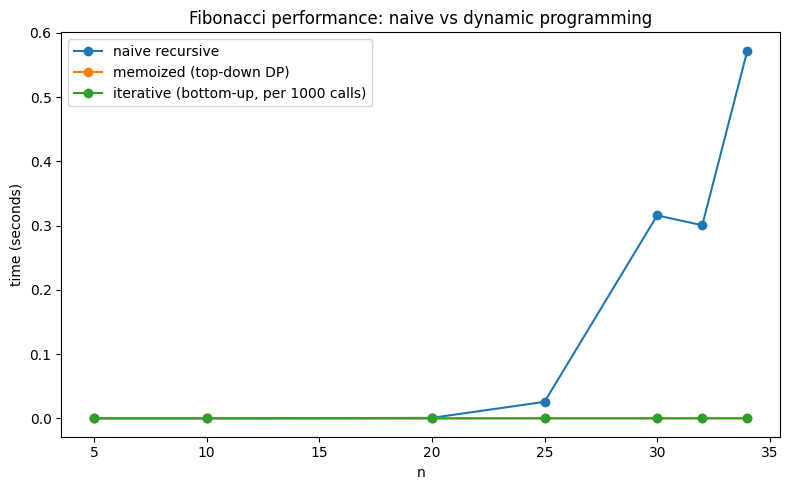

In [42]:
# Single chart: n vs time
import matplotlib.pyplot as plt

n_vals = [r[0] for r in rows]
t_rec = [r[1] for r in rows]
t_mem = [r[2] for r in rows]
t_itr = [r[3] for r in rows]

plt.figure(figsize=(8,5))
plt.plot(n_vals, t_rec, marker="o", label="naive recursive")
plt.plot(n_vals, t_mem, marker="o", label="memoized (top‑down DP)")
plt.plot(n_vals, t_itr, marker="o", label="iterative (bottom‑up, per 1000 calls)")
plt.xlabel("n")
plt.ylabel("time (seconds)")
plt.title("Fibonacci performance: naive vs dynamic programming")
plt.legend()
plt.tight_layout()
plt.show()

### Takeaways
- **Naive recursion** recomputes the same subproblems → **exponential** time.
- **Memoization** caches subresults → **linear** time for first call; subsequent calls are O(1) for the same `n`.
- **Bottom‑up** is also **linear**, often fastest in Python for single calls due to low overhead.
- In numeric work, prefer **tabulation or memoization**; or use libraries (NumPy) or JITs (Numba) for heavy loops.